In [7]:
import numpy as np
import matplotlib.pyplot as plt 
from performance_simulation import *

In [ ]:
#General parameters
years = 47
dt = 15
time = int(261 * years)

#Simulation parameters
yearly_return = 1.07

daily_return = 1.001
daily_loss = 1 - 0.01

gain_phase = 0.7
loss_phase = 1 - gain_phase

mode = "fixed_gain_phase"
#mode = "fixed_return"
 

#Tade parameters
trades = 12 * years
max_trades = 20 * years
hold_time = [30,5,5,0]
time_after_reversel = 0
smooth_period = 20

trade_cost = [1,0]
spread = 0.002
tax_rate = 0.025
tax_allowance = 1000

initial_investment = 5000
saving_plan_period = 22
#saving_plan = {0: 50, 72:60, 84:500, 96:1000, 132:2000, 204:2500, 264:3000, 324:3500, 384:4000, 444:4500, 504:5000}
#saving_plan = {12*i: 500 * 1.02**(i*12) for i in range(0,years)}


sim = ChartSimulation(yearly_return=yearly_return, daily_return=daily_return, daily_loss=daily_loss, gain_phase=gain_phase, loss_phase=loss_phase, mode=mode, 
                      initial_investment=initial_investment, saving_plan=saving_plan, saving_plan_period=saving_plan_period,  dt=dt, time=time, 
                      trades=trades, max_trades=max_trades, hold_time=hold_time, time_after_reversel=time_after_reversel, smooth_period=smooth_period, trade_cost=trade_cost, spread=spread, tax_rate=tax_rate, tax_allowance=tax_allowance
                      )

performance, phase = sim.simulate_performance()

buy_and_hold_performance = sim.buy_and_hold()[0]
random_swing_performance_analyse = sim.random_swing_trade()[0]
swing_performance_analyse = sim.swing_trade()[0]

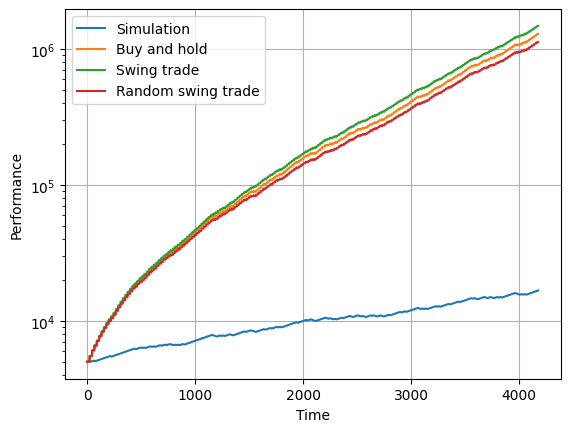

Initial invetment:  5000
Total Investment:  931627.9436288902

Index performance:
    Absolute: 16744.854, Relative: 3.349
    Yearly performance: 1.078

Buy and hold return:
    Absolute: 1297146.809, Relative: 1.392
    Yearly performance: 1.021, Internal rate of return: 1.077
    Taxes: 0, Transaction cost: 1898.575

Swing trade return:
    Absolute: 1485005.364, Relative: 1.594
    Yearly performance: 1.03, Internal rate of return: 1.105
    Taxes: 11749.676, Transaction cost: 32762.195

Random swing trade return:
    Absolute: 1128658.547, Relative: 1.211
    Yearly performance: 1.012, Internal rate of return: 1.046
    Taxes: 6007.535, Transaction cost: 66473.912

Best return:  35419.462


In [3]:
plt.plot(performance, label="Simulation")
plt.plot(buy_and_hold_performance, label="Buy and hold")
plt.plot(swing_performance_analyse, label="Swing trade")
plt.plot(random_swing_performance_analyse, label="Random swing trade")
#plt.axhline(1, color="black", linestyle="--")   

plt.xlabel("Time")
plt.ylabel("Performance")

plt.grid()
plt.legend()

plt.yscale("log")

plt.show()


#sim.print_parameters()
sim.print_results(accuracy=3)
#sim.plot_performance()

In [4]:
mc = MonteCarloSimulation(chartsim=sim, parallel=True)
_ = mc.mc_artificial_chart(n=500)

# mc.hist_performance(bins=30)

100%|██████████| 500/500 [01:57<00:00,  4.26it/s]


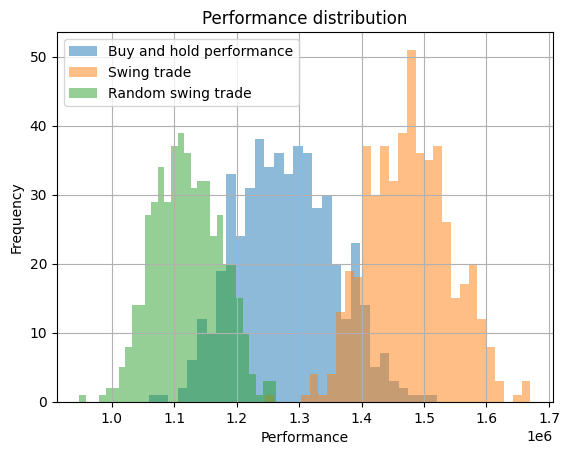

Initial invetment:  5000
Total money invested:  931627.9436288902

Index performance:
  Overall return: 14884.446 +/- 2226.107 (Median: 14709.561)
  Relative performance: 2.977 +/- 0.445 (Median: 2.942)
  Yearly performance: 1.07 +/- 0.01 (Median: 1.07)

Buy and hold return:
  Overall return: 1279017.793 +/- 77259.877 (Median: 1277122.861)
  Relative performance: 1.373 +/- 0.083 (Median: 1.371)
  Yearly performance: 1.02 +/- 0.004 (Median: 1.02)
  Internal rate of return: 1.073 +/- 0.013 (Median: 1.073)
  Taxes: 0.0 +/- 0.0 (Median: 0.0)
  Transaction cost: 1898.575 +/- 0.0 (Median: 1898.575)

Swing trade return:
  Overall return: 1476610.361 +/- 65967.542 (Median: 1476400.35)
  Relative performance: 1.585 +/- 0.071 (Median: 1.585)
  Yearly performance: 1.029 +/- 0.003 (Median: 1.029)
  Internal rate of return: 1.103 +/- 0.009 (Median: 1.103)
  Taxes: 13166.52 +/- 1648.596 (Median: 13048.735)
  Transaction cost: 34440.528 +/- 3505.543 (Median: 34441.069)

Random swing trade return:
  O

In [6]:


bins=30
limits=None

#plt.hist(mc.index_performance, bins=bins, range=limits, alpha=0.5, label="Index Performance")
plt.hist(mc.buy_and_hold_profit, bins=bins, range=limits, alpha=0.5, label="Buy and hold performance")
plt.hist(mc.swing_profit, bins=bins, range=limits, alpha=0.5, label="Swing trade")
plt.hist(mc.random_swing_profit, bins=bins, range=limits, alpha=0.5, label="Random swing trade")

plt.xlabel("Performance")
plt.ylabel("Frequency")
plt.title("Performance distribution")

plt.grid()
plt.legend()
plt.show()

mc.print_results(accuracy=3)